In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

df_groups = pd.read_csv('../data/PeopleAtPark.csv')
print(df_groups.head())

   Unnamed: 0         id  timeSpentInPark  daysAtPark  numberCheckin  \
0           0  1591741.0          41994.0         1.0           27.0   
1           1   825652.0         120222.0         3.0           58.0   
2           2   179386.0         103244.0         3.0           50.0   
3           3   531348.0          57521.0         2.0           28.0   
4           4  1483004.0          42042.0         1.0           20.0   

   distanceTraveled  numberThrill  numberKiddie  numberEveryone  numberShows  \
0       1054.563445          11.0           8.0             6.0          2.0   
1       2282.952296          24.0          16.0            12.0          6.0   
2       2303.348577          24.0           7.0            12.0          7.0   
3       1181.540306          13.0           2.0             9.0          4.0   
4        875.279215          10.0           3.0             1.0          6.0   

   numberInfo  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4     

# Get basic information about the dataset

from describe we see that we have non-null

In [22]:

# Summary statistics
print(df_groups.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11455 entries, 0 to 11454
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11455 non-null  int64  
 1   id                11455 non-null  float64
 2   timeSpentInPark   11455 non-null  float64
 3   daysAtPark        11455 non-null  float64
 4   numberCheckin     11455 non-null  float64
 5   distanceTraveled  11455 non-null  float64
 6   numberThrill      11455 non-null  float64
 7   numberKiddie      11455 non-null  float64
 8   numberEveryone    11455 non-null  float64
 9   numberShows       11455 non-null  float64
 10  numberInfo        11455 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 984.5 KB
None


From describe we see alot of interestng info from the mean of some columns; averaging 56654 sekunds, 28 check ins, number pf thrills 15

In [23]:

# Summary statistics
print(df_groups.describe())

         Unnamed: 0            id  timeSpentInPark    daysAtPark  \
count  11455.000000  1.145500e+04     11455.000000  11455.000000   
mean    5727.000000  1.054906e+06     56654.309123      1.537931   
std     3306.918001  6.050129e+05     31621.107341      0.751767   
min        0.000000  4.360000e+02         0.000000      1.000000   
25%     2863.500000  5.361820e+05     35343.000000      1.000000   
50%     5727.000000  1.053269e+06     44759.000000      1.000000   
75%     8590.500000  1.581155e+06     77154.000000      2.000000   
max    11454.000000  2.096715e+06    147569.000000      3.000000   

       numberCheckin  distanceTraveled  numberThrill  numberKiddie  \
count   11455.000000      11455.000000  11455.000000  11455.000000   
mean       28.706940       1215.017946     15.289393      4.973549   
std        19.226139        830.422827     13.251149      4.088691   
min         1.000000          0.000000      0.000000      0.000000   
25%        16.000000        667.48402

In [24]:
df = df_groups.drop(['id'], axis = 1)
df.head()

,Unnamed: 0,timeSpentInPark,daysAtPark,numberCheckin,distanceTraveled,numberThrill,numberKiddie,numberEveryone,numberShows,numberInfo
0,0,41994.0,1.0,27.0,1054.563445,11.0,8.0,6.0,2.0,0.0
1,1,120222.0,3.0,58.0,2282.952296,24.0,16.0,12.0,6.0,0.0
2,2,103244.0,3.0,50.0,2303.348577,24.0,7.0,12.0,7.0,0.0
3,3,57521.0,2.0,28.0,1181.540306,13.0,2.0,9.0,4.0,0.0
4,4,42042.0,1.0,20.0,875.279215,10.0,3.0,1.0,6.0,0.0


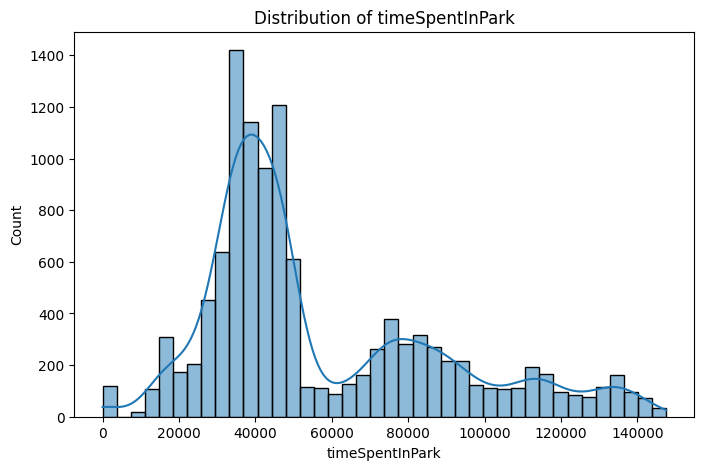

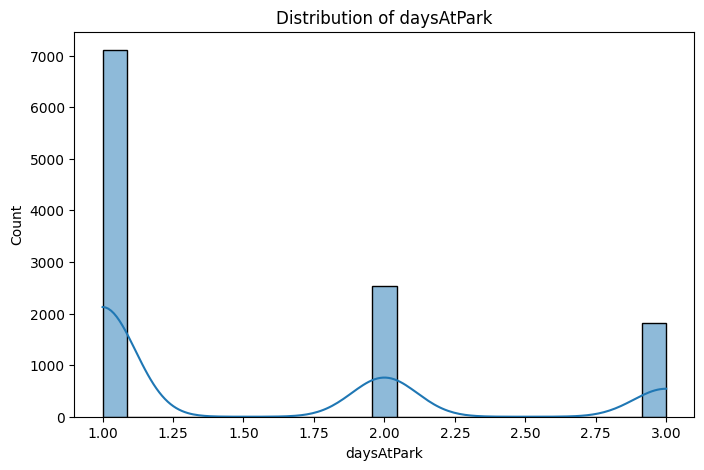

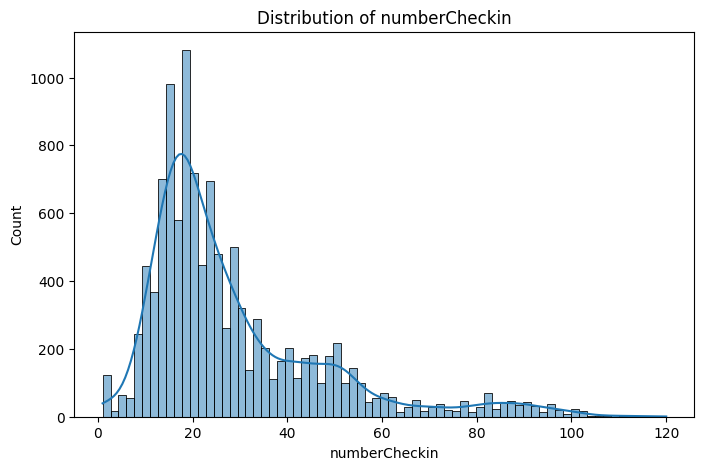

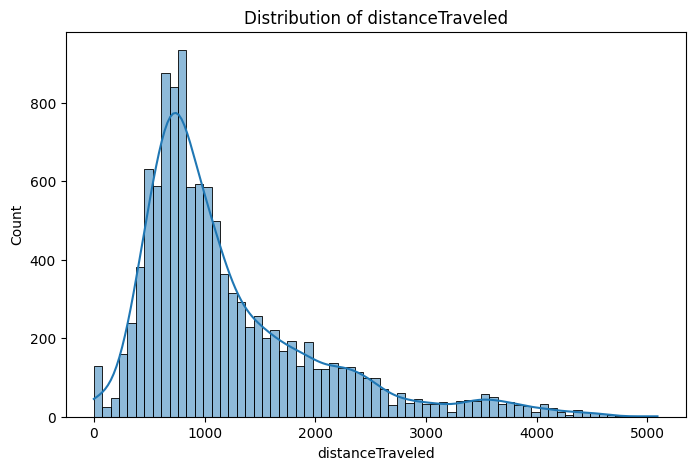

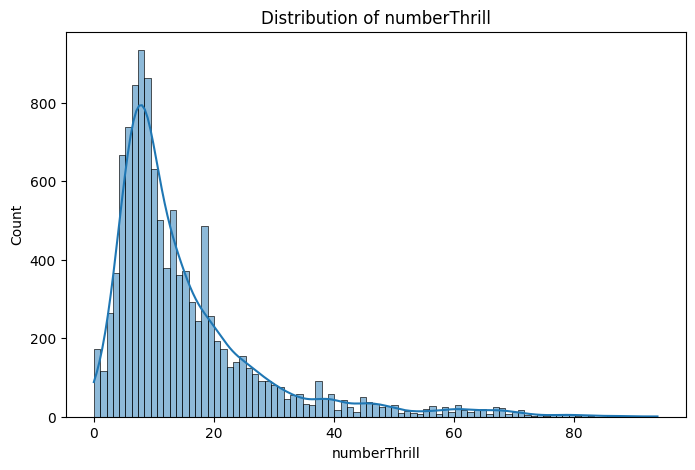

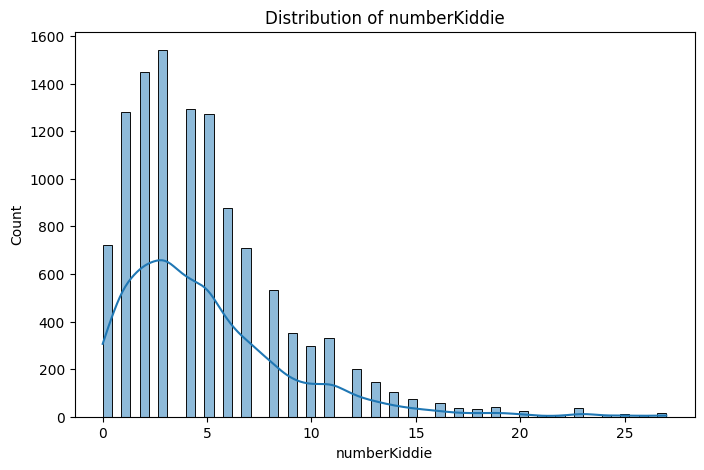

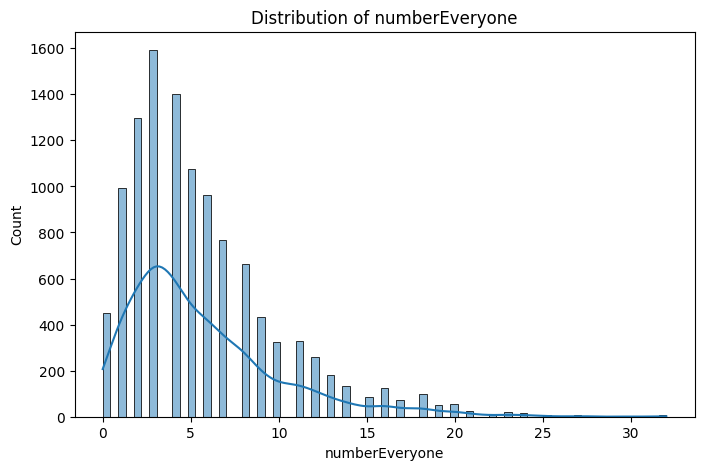

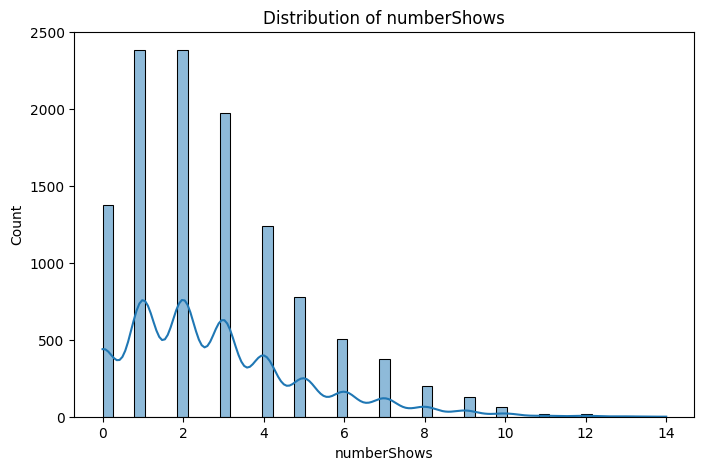

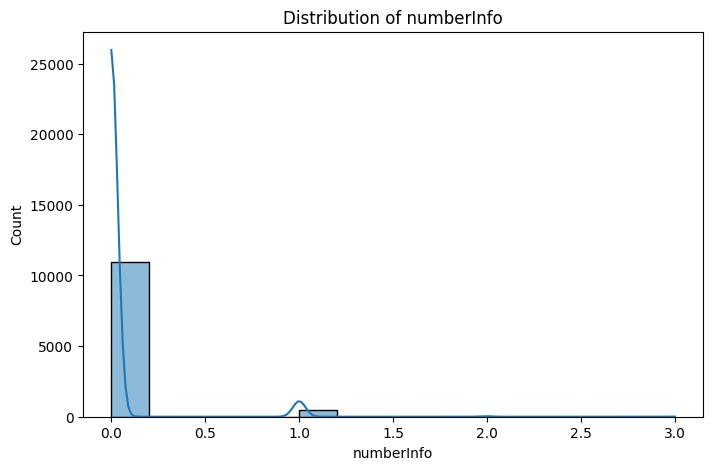

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns[1:]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

df_groups = pd.read_csv('../data/PeopleAtPark.csv')


df_groups = df_groups.drop(['id'], axis=1)
kmeans = KMeans(n_clusters=12, random_state=0).fit(df_groups)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
df_groups['cluster'] = labels

groups = pd.DataFrame(columns=['id', 'timeSpentInPark', 'daysAtPark', 'numberCheckin',
                           'distanceTraveled', 'numberThrill', 'numberKiddie',
                           'numberEveryone', 'numberShows', 'numberInfo', 'sizeOfGroup', 'HowCommon'])

for group, centroid in enumerate(centroids):
  
    group_data = {
        "id": group,
        "timeSpentInPark": round(centroid[0]),
        "daysAtPark": round(centroid[1], 2),
        "numberCheckin": round(centroid[2], 1),
        "distanceTraveled": round(centroid[3], 2),
        "numberThrill": round(100 * centroid[4] / centroid[2], 4),
        "numberKiddie": round(100 * centroid[5] / centroid[2], 4),
        "numberEveryone": round(100 * centroid[6] / centroid[2], 4),
        "numberShows": round(100 * centroid[7] / centroid[2], 4),
        "numberInfo": round(100 * centroid[8] / centroid[2], 4),
        "sizeOfGroup": np.count_nonzero(labels == group),
        "HowCommon": round(100 * np.count_nonzero(labels == group) / len(labels), 2)
    }
#groups = groups.append(group_data, ignore_index=True)

    







C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


36709.084634346895
115927.62225969571
75570.3700483093
17441.046686747104
87922.32473118293
46182.87490165235
134959.50902527058
29045.6808703537
26.65254237296176
61779.63598326358
101546.66743648973
37072.586689037984
